In [2]:
import numpy as np
import scipy as sp
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

In [4]:
gam = 1.0
delp = 0.0

def gamPrime(Omega, thetaBE, delB):
    return 2.0*np.sqrt((gam/2.0)**2.0 + Omega**2.0*(np.cos(thetaBE))**2.0*(1.0-3.0*(np.cos(thetaBE))**2.0)/(1.0+3.0*(np.cos(thetaBE))**2.0) \
        + (np.cos(thetaBE))**2.0/(1.0+3.0*(np.cos(thetaBE))**2.0)*(Omega**4.0/(16.0*delB**2.0) + 16.0*delB**2.0))

def rhoee(Omega, thetaBE, gamPrime):
    return 3.0*Omega**2.0*(np.cos(thetaBE))**2.0*(np.sin(thetaBE))**2.0/ \
        (4.0*(1.0+3.0*(np.cos(thetaBE))**2.0)*((gamPrime/2.0)**2.0+delp**2.0))

In [40]:
Omega = np.sqrt(3.0)/5.0
delBs = np.logspace(-3, 1, 1000)
thetaBEs = np.linspace(0.0, np.pi/2.0, 1000)
[X,Y] = np.meshgrid(delBs, thetaBEs)
Z = rhoee(Omega, Y, gamPrime(Omega, Y, X))

C:\Users\Mark\AppData\Local\Temp\ipykernel_20576\2395955957.py:5: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contour(X, 360.0*Y/(2.0*np.pi), Z, levels,  vmin=np.min(levels), vmax=np.max(levels), norm=matplotlib.colors.LogNorm())


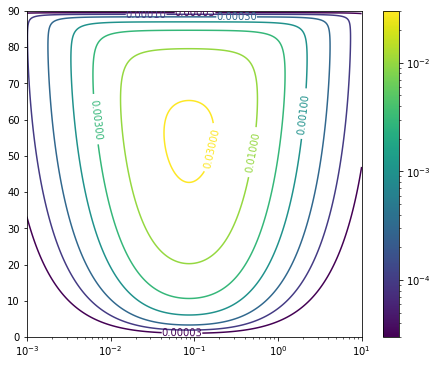

In [74]:
plt.rcParams["figure.figsize"] = [7.5, 6]
levels = np.array([0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03])
fig, ax = plt.subplots()
plt.xscale("log")
cs = ax.contour(X, 360.0*Y/(2.0*np.pi), Z, levels,  vmin=np.min(levels), vmax=np.max(levels), norm=matplotlib.colors.LogNorm())
ax.clabel(cs, inline=True, fontsize=10)
fig.colorbar(ScalarMappable(norm=cs.norm, cmap=cs.cmap))
#plt.figure(figsize=(8,9), dpi=500)
#ax.
plt.show()


In [12]:
gam = 2.0*np.pi*19.6e6 #pg 25 of Lange thesis
Omega = 100.0
delp = gam/2.0
delBs = np.logspace(-3, 0, 1000)
thetaBEs = np.linspace(0.0, np.pi/2.0, 1000)
[X,Y] = np.meshgrid(delBs, thetaBEs)
Z = rhoee(Omega, Y, gamPrime(Omega, Y, X))
#rhoee(Omega, thetaBE, gamPrime)
Z

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.11192563e-19, 6.11194293e-19, 6.11195998e-19, ...,
        6.11318501e-19, 6.11318501e-19, 6.11318501e-19],
       [2.44475968e-18, 2.44476659e-18, 2.44477342e-18, ...,
        2.44526342e-18, 2.44526342e-18, 2.44526342e-18],
       ...,
       [9.78069090e-18, 9.78069090e-18, 9.78069090e-18, ...,
        9.78069098e-18, 9.78069098e-18, 9.78069098e-18],
       [2.44525133e-18, 2.44525133e-18, 2.44525133e-18, ...,
        2.44525133e-18, 2.44525133e-18, 2.44525133e-18],
       [3.70835320e-45, 3.70835320e-45, 3.70835320e-45, ...,
        3.70835320e-45, 3.70835320e-45, 3.70835320e-45]])

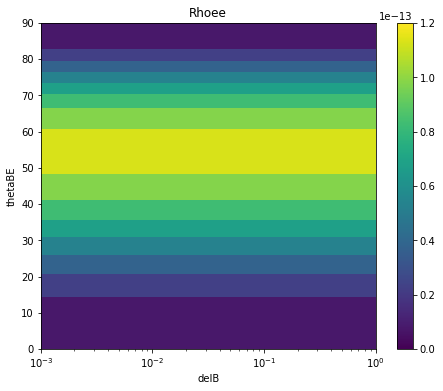

In [142]:
plt.rcParams["figure.figsize"] = [7.5, 6]
fig, ax = plt.subplots()
plt.xscale("log")
cs = ax.contourf(X, 360.0*Y/(2.0*np.pi), Z)
fig.colorbar(ScalarMappable(norm=cs.norm, cmap=cs.cmap))
ax.set_title('Rhoee') 
ax.set_xlabel('delB') 
ax.set_ylabel('thetaBE') 
plt.show()

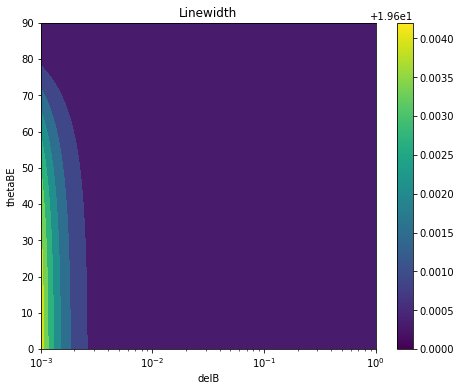

In [143]:
Z = gamPrime(Omega, Y, X)/(2.0*np.pi*1e6)
plt.rcParams["figure.figsize"] = [7.5, 6]
fig, ax = plt.subplots()
plt.xscale("log")
cs = ax.contourf(X, 360.0*Y/(2.0*np.pi), Z)
fig.colorbar(ScalarMappable(norm=cs.norm, cmap=cs.cmap))
ax.set_title('Linewidth') 
ax.set_xlabel('delB') 
ax.set_ylabel('thetaBE') 
plt.show()

## Break

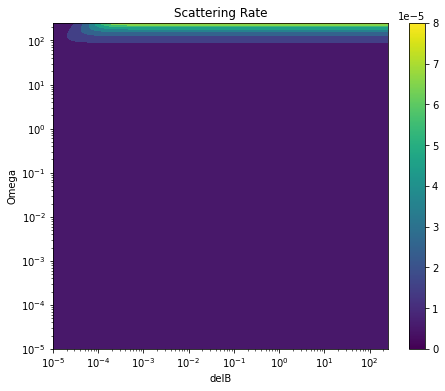

In [139]:
gam = 123.2e6 #pg 51 of Olmshenk 2P1/2 natural linewidth
delp = gam/2.0
delBs = np.logspace(-5, 2.4, 1000)
Omegas = np.logspace(-5, 2.4, 1000)
[X,Y] = np.meshgrid(delBs, Omegas)
Z = rhoee(Y, np.pi/4.0, gamPrime(Y, np.pi/4.0, X))*gam
#rhoee(Omega, thetaBE, gamPrime):
#gamPrime(Omega, thetaBE, delB):
plt.rcParams["figure.figsize"] = [7.5, 6]
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")
cs = ax.contourf(X, Y, Z)
fig.colorbar(ScalarMappable(norm=cs.norm, cmap=cs.cmap))
ax.set_title('Scattering Rate') 
ax.set_xlabel('delB') 
ax.set_ylabel('Omega') 
plt.show()

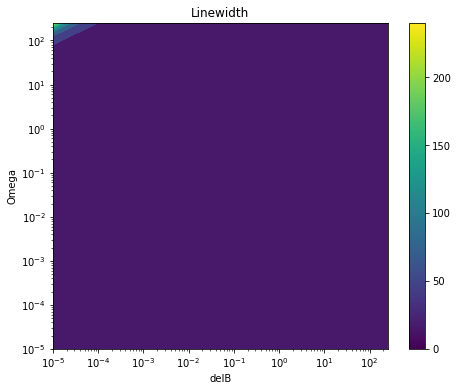

In [137]:
Z = gamPrime(Y, np.pi/4.0, X)/(2.0*np.pi*1e6)
plt.rcParams["figure.figsize"] = [7.5, 6]
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")
cs = ax.contourf(X, Y, Z)#, norm=matplotlib.colors.LogNorm())
ax.set_title('Linewidth') 
ax.set_xlabel('delB') 
ax.set_ylabel('Omega') 
fig.colorbar(ScalarMappable(norm=cs.norm, cmap=cs.cmap))
plt.show()

I want to make slices like the two plots above with delB on the x axis and Omega on the y-axis where each slice has a different thetaBE value. I could go by like 15 degrees per slice to start with. 

0.0


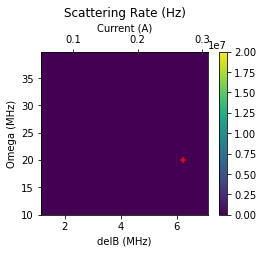

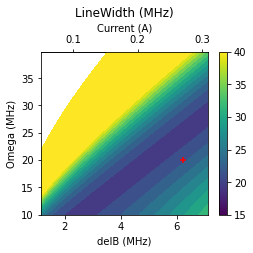

15.0


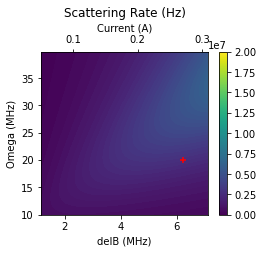

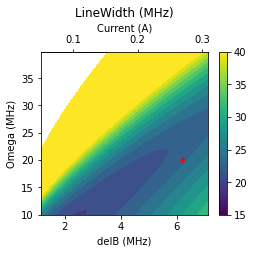

30.0


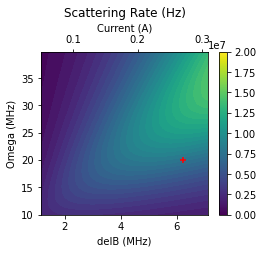

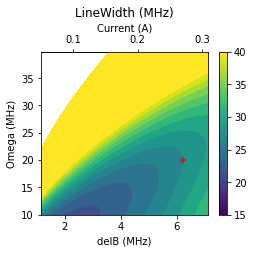

45.0


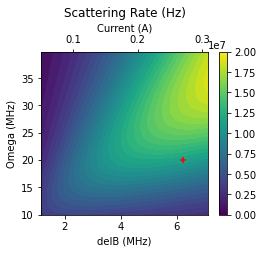

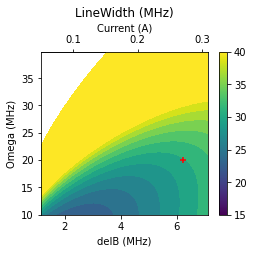

60.0


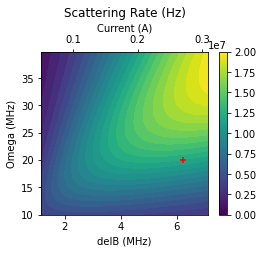

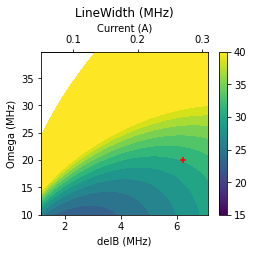

75.0


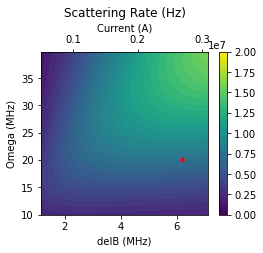

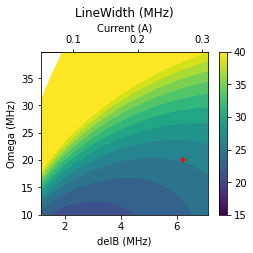

90.0


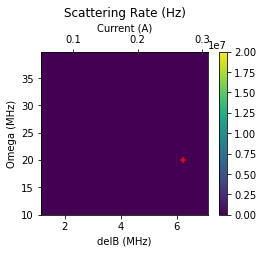

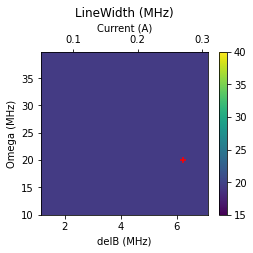

In [8]:
#2.4 muTesla/mA for trap magnet
#320 mA max current -> 320*2.4 = 768e-6 T
hbar = 1.054571817e-34
B = 768e-6 #T
bohrMag = 9.2740100783e-24 #J/T
q = 2.0*np.pi*23.002e6
I = 0.27 #A
delB = q*I

gam = 2.0*np.pi*19.6e6 #pg 51 of Olmshenk 2P1/2 natural linewidth
delp = gam/2.0
Omega = 2.0*np.pi*19.915e6
#delBs = np.logspace(5, 8, 1000)
#Omegas = np.logspace(5, 6, 1000)
#OmegaSat = np.sqrt(0.5)*gam

delBs = np.linspace(0.05*q, 0.31*q, 1000)
#Omegas = np.linspace(15.0e6*2.0*np.pi, 25e6*2.0*np.pi, 1000)
Omegas = np.linspace(Omega*0.5, Omega*2.0, 1000)
[X,Y] = np.meshgrid(delBs, Omegas)

q = 23.002#e6*2.0*np.pi
def del2I(x):
    return x/q

def I2del(x):
    return x*q

sliceNum = 7
for ii in range(sliceNum):
    thetaBE = ii*15.0*(2.0*np.pi/360.0)
    print(ii*15.0)
    #thetaBE = np.pi*25.0/180.0
    scatt = rhoee(Y, thetaBE, gamPrime(Y, thetaBE, X))*gam
    plt.rcParams["figure.figsize"] = [7.5/2.0, 6/2.0]
    fig, ax = plt.subplots()
    secax = ax.secondary_xaxis('top', functions=(del2I, I2del))
    secax.set_xlabel('Current (A)')
    #plt.xscale("log")
    #plt.yscale("log")
    cs = ax.contourf(X/(2.0*np.pi*1e6), Y/(2.0*np.pi*1e6), scatt, vmin=0.0,vmax=2e7, levels=30)
    fig.colorbar(ScalarMappable(norm=cs.norm, cmap=cs.cmap))
    ax.set_title('Scattering Rate (Hz)') 
    ax.set_xlabel('delB (MHz)') 
    ax.set_ylabel('Omega (MHz)')
    plt.scatter([q*0.27],[19.915],marker="+",color="r")
    plt.show()
    
    gamPrimes = gamPrime(Y, thetaBE, X)/(2.0*np.pi*1e6)
    #plt.rcParams["figure.figsize"] = [7.5, 6]
    fig, ax = plt.subplots()
    secax = ax.secondary_xaxis('top', functions=(del2I, I2del))
    secax.set_xlabel('Current (A)')
    #plt.xscale("log")
    #plt.yscale("log")
    levels = np.linspace(15.0, 100.0, 50)
    cs = ax.contourf(X/(2.0*np.pi*1e6), Y/(2.0*np.pi*1e6), gamPrimes, vmin=15,vmax=40, levels=levels)
    fig.colorbar(ScalarMappable(norm=cs.norm, cmap=cs.cmap))
    ax.set_title('LineWidth (MHz)') 
    ax.set_xlabel('delB (MHz)')  
    ax.set_ylabel('Omega (MHz)')
    plt.scatter([q*0.27],[19.915],marker="+",color="r")
    plt.show()

In [230]:
gam = 2.0*np.pi*19.6e6
q = 23.002e6*2.0*np.pi

Omega = 19.915e6*2.0*np.pi
thetaBE = 25.0*np.pi/180.0
delB = 0.27*q
scatt1 = rhoee(Omega, thetaBE, gamPrime(Omega, thetaBE, delB))*gam
Omega = 25e6*2.0*np.pi
thetaBE = 25.0*np.pi/180.0
delB = 0.27*q
scatt2 = rhoee(Omega, thetaBE, gamPrime(Omega, thetaBE, delB))*gam
print(scatt1)
print(scatt2)

5940320.941723131
9004102.749347946


In [231]:
9004102.749347946/5940320.941723131

1.5157603162660254

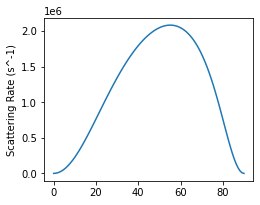

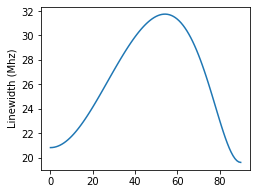

In [10]:
pts = 100
Omega = 21.055e6*2.0*np.pi
gam = 2.0*np.pi*19.6e6
q = 23.002e6*2.0*np.pi
delB = 0.27*q
thetaBEs = np.linspace(0.0, np.pi/2.0, pts)
scatts = np.zeros(pts)
linewidths = np.zeros(pts)
for ii in range(pts):
    scatts[ii] = rhoee(Omega, thetaBEs[ii], gamPrime(Omega, thetaBEs[ii], delB))*gam
    linewidths[ii] = gamPrime(Omega, thetaBEs[ii], delB)
plt.plot(thetaBEs*180/np.pi, scatts/(2.0*np.pi))
plt.ylabel("Scattering Rate (s^-1)")
plt.show()
plt.plot(thetaBEs*180/np.pi, linewidths/(2.0*np.pi)*1e-6)
plt.ylabel("Linewidth (Mhz)")
plt.show()